# **Logistic Regression**

**Logistic regression** is a statistical and machine learning model used for *binary classification* tasks, where the goal is to predict one of two possible outcomes (classes).

## **Context**

### **Instructions**



The following steps are required to complete the assignment:

- Use the Sigmoid Function
- Compute the Logistic Regression Cost Function
- Make a prediction for the test sample
- Compute Regularized Cost Function

### **Dataset**



For this assignment, we will use the **Titanic Dataset**. It contains information about passengers aboard the RMS Titanic, which unfortunately sank in 1912.

The link to it can be found [here](https://www.kaggle.com/competitions/titanic).

represent the survival status of a passenger. They can be:
- `0`: Did not survive
- `1`: Survived

**The features** include various attributes about passengers, such as:
- `Pclass`: Passenger class (1st, 2nd, 3rd)
- `Sex`: Gender of the passenger (male or female)
- `Age`: Age of the passenger
- `SibSp`: Number of siblings/spouses aboard
- `Parch`: Number of parents/children aboard
- `Fare`: Fare paid for the ticket
- `Embarked`: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)


## **Model Setup**

### **Environment**


Before we can get into analysis, we need to set up the environment with all the libraries and functions that we will need.

#### Import Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

#### Function Definitions

In [39]:
# Logistical Regression Class
class LogisticalRegressionClass:

    def __init__(self, learningRate = 0.001, regParam = 2, iterations = 100, batchSize = 10):
        self.learningRate = learningRate
        self.iterations = iterations
        self.batchSize = batchSize
        self.regParam = regParam
        self.cost = []
        self.coefficient = None

    # Get the next batch of features and targets
    def getNextBatch(self, x, y):
            numSamples = x.shape[0]
            size = self.batchSize
            for i in range(0, numSamples, size):
                yield ( x[i : i + size], y[i : i + size] )

    # Sigmoid function
    def sigmoid_activation(self, z):
        return 1 / (1 + np.exp(-z))

    # Calculates the cost of the hypothesis
    def calculate_cost(self, h, y):
        e = 1e-10
        return -(sum(y * np.log(h + e) + (1 - y) * np.log(1 - h + e))/len(y * np.log(h + e) + (1 - y) * np.log(1 - h + e)))

    # Fits the model
    def fit(self, x_with_bias, y):
        featuresNum = x_with_bias.shape[1]
        samplesNum = x_with_bias.shape[0]

        bias = np.ones((samplesNum, 1))
        x_with_bias = np.concatenate((bias, x_with_bias), axis = 1)

        weights = np.random.randn(featuresNum+1)

        self.cost = []

        for _ in range(self.iterations):
            loss = []

            for _, (batchX, batchY) in enumerate(self.getNextBatch(x_with_bias, y)):

                batchSize = batchX.shape[0]
                linearCombination = dot(batchX, weights)
                predictions = self.sigmoid_activation(linearCombination)

                ridge = (self.regParam / (2 * batchSize)) * sum(weights**2)
                cost = self.calculate_cost(predictions, batchY) + ridge
                loss.append(cost)

                error = predictions - batchY
                gradient = (1 / batchSize) * (dot(transpose(batchX), error) + (self.regParam / batchSize) * weights)

                weights = weights - self.learningRate * gradient

            # Save the cost of this iteration
            self.cost.append(sum(loss)/len(loss))

        # Save the coefficients
        self.coefficient = weights

        return self

    # Predict the labels
    def predict(self, x, threshold = 0.5):
        labels = []

        weights = self.coefficient[1:]
        bias = self.coefficient[0]

        y_pred = dot(x, weights) + bias
        activation = self.sigmoid_activation(y_pred)

        for i in activation:
            if i > threshold:
                labels.append(1)
            else:
                labels.append(0)

        return np.array(labels)
    


# Computes the dot product of a matrix and a vector
def dot(matrix, vector):
    rowsNum = matrix.shape[0]
    columnsNum = matrix.shape[1]

    result = []

    for i in range(rowsNum):
        value = 0.0
        for j in range(columnsNum):
            value = value + matrix[i][j] * vector[j]
        result.append(value)

    return np.array(result)

# Transposes a matrix
def transpose(matrix):
    rowsNum = len(matrix)
    columnsNum = len(matrix[0])

    transposedMatrix = []

    for j in range(columnsNum):
        columnValues = []
        for i in range(rowsNum):
            val = matrix[i][j]
            columnValues.append(val)
        transposedMatrix.append(columnValues)

    return np.array(transposedMatrix)



### **Dataset Preparation**

Before we start using the dataset, we must first prepare it.

#### Splitting and Normalizing the Data

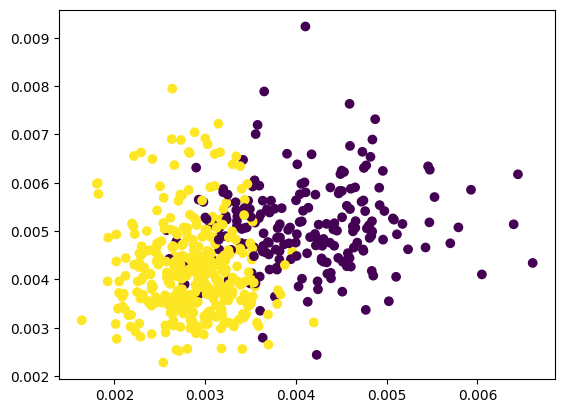

In [35]:
# Loads the dataset from sklearn
data = load_breast_cancer()

# Splits the features and target labels
X = data.data
y = data.target

# Normalizes the data
X = (X- X.min())/ (X.max() - X.min())

## **Implementation**

### **Visualizing the Data**

In [ ]:
# Scatter plot of the data
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'viridis')

### **Training and Fitting the Logistic Regression Model**

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = LogisticalRegressionClass(learningRate=0.1)
model.fit(x_train, y_train)

### **Plotting the Cost Function**

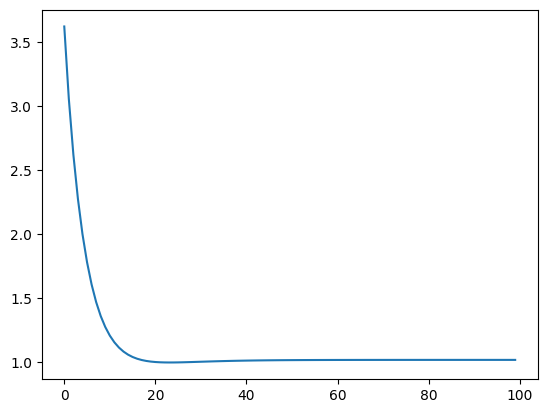

In [51]:
cost = model.cost
plt.plot(cost)